In [2]:
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline 
# prints outputs driectly below the cell rather than in another tab or window

In [3]:
pd.options.display.max_rows = 6

In [11]:
dailyhire = pd.read_csv('tfl-daily-cycle-hires.csv', header = 5) 
#header determines where the column headers are in this case row 5

In [12]:
dailyhire.head
dailyhire.columns

Index(['Day', 'Number of Bicycle Hires', 'Unnamed: 2', 'Month',
       'Number of Bicycle Hires.1', 'Unnamed: 5', 'Year',
       'Number of Bicycle Hires.2', 'Unnamed: 8', 'Unnamed: 9', 'Month.1',
       'Average Hire Time (mins)', 'Unnamed: 12', 'Against last month',
       'Against last year'],
      dtype='object')

In [27]:
# Assistant
# Cleaning the Data

# First, let's handle the Year column properly
# Instead of filling with 0, let's use a more appropriate approach
# Option 1: Drop rows with NaN in Year column
dailyhire = dailyhire.dropna(subset=['Year'])

# Now convert Year to integer
dailyhire['Year'] = dailyhire['Year'].astype(int)

# For Month-Year conversion, we need to handle the format more carefully
# Using errors='coerce' will convert problematic dates to NaT (Not a Time)
# which we can then handle appropriately
dailyhire['Month-Year'] = pd.to_datetime(dailyhire['Month-Year'], errors='coerce')

# Option 1: Drop rows with invalid dates
dailyhire = dailyhire.dropna(subset=['Month-Year'])

print("First 5 rows:")
display(dailyhire.head())

First 5 rows:


,Day,Number of Bicycle Hires,Unnamed: 2,Month,Number of Bicycle Hires.1,Unnamed: 5,Year,Number of Bicycle Hires.2,Unnamed: 8,Unnamed: 9,Month.1,Average Hire Time (mins),Unnamed: 12,Against last month,Against last year,Month-Year
0,30/07/2010,"6,897",NaN,Jul 10,"12,461",NaN,2010,"2,180,813",NaN,NaN,Jul 10,17.0,NaN,NaN,NaN,2010-07-10
1,31/07/2010,"5,564",NaN,Aug 10,"341,203",NaN,2011,"7,142,449",NaN,NaN,Aug 10,17.0,NaN,NaN,NaN,2011-08-10
2,01/08/2010,"4,303",NaN,Sep 10,"540,859",NaN,2012,"9,519,283",NaN,NaN,Sep 10,15.0,NaN,NaN,NaN,2012-09-10
3,02/08/2010,"6,642",NaN,Oct 10,"544,412",NaN,2013,"8,045,459",NaN,NaN,Oct 10,15.0,NaN,NaN,NaN,2013-10-10
4,03/08/2010,"7,966",NaN,Nov 10,"456,304",NaN,2014,"10,023,897",NaN,NaN,Nov 10,14.0,NaN,NaN,NaN,2014-11-10


In [32]:
monthly_totals = dailyhire.groupby('Month-Year')['Number of Bicycle Hires.1'].sum()
monthly_totals.head

<bound method NDFrame.head of Month-Year
2010-07-10     12,461
2011-08-10    341,203
2012-09-10    540,859
               ...   
2023-08-11    642,440
2024-09-11    684,780
2025-10-11    708,802
Name: Number of Bicycle Hires.1, Length: 16, dtype: object>

In [65]:
# Step 2: Read with a more flexible approach - read_csv with sep=None to auto-detect
import pandas as pd  # Make sure pandas is imported

# Increase the number of header rows to skip
weather = pd.read_csv("heathrowdata.txt", 
                     skiprows=7,  # Increased from 6 to 7 to skip all header rows
                     sep=r'\s+',  # Use regex to handle variable whitespace
                     engine='python',  # More flexible but slower engine
                     header=None,  # Don't use any row as header
                     on_bad_lines='skip')  # Skip problematic lines

print(f"DataFrame shape after import: {weather.shape}")

# Step 3: Assign column names based on actual number of columns
num_cols = weather.shape[1]
print(f"Detected {num_cols} columns")

# Create column names based on what we have
if num_cols >= 7:
    # If we have 7 or more columns
    col_names = ["Year", "Month", "Tmax", "Tmin", "af days", "Rainfall", "sun hours"]
    # Assign names to first 7 columns, ignore the rest
    weather.columns = col_names + [f"extra_{i}" for i in range(num_cols - 7)]
    # Keep only the columns we need
    weather = weather[col_names]
else:
    # If we have fewer than 7 columns, name what we have
    col_names = ["Year", "Month", "Tmax", "Tmin", "Rainfall"]
    if num_cols == 6:
        col_names.insert(4, "af days")
    weather.columns = col_names
    # Some columns will be missing, but we'll work with what we have

# Step 4: Filter to keep only data from 2010 onwards
# Check if Year column is already numeric
if weather["Year"].dtype == 'object':
    # If Year is stored as strings, filter numeric values first
    weather = weather[pd.to_numeric(weather["Year"], errors='coerce').notna()]
    weather["Year"] = pd.to_numeric(weather["Year"])
else:
    # Year is already numeric, no need for string operations
    pass

# Now filter for years >= 2010
weather = weather[weather["Year"] >= 2010]  # Filter for years >= 2010

print(f"Final DataFrame shape: {weather.shape}")
print(f"Final columns: {weather.columns.tolist()}")
weather.head()

DataFrame shape after import: (924, 7)
Detected 7 columns
Final DataFrame shape: (180, 7)
Final columns: ['Year', 'Month', 'Tmax', 'Tmin', 'af days', 'Rainfall', 'sun hours']


,Year,Month,Tmax,Tmin,af days,Rainfall,sun hours
744,2010,1,4.5,-0.3,15,51.8,51.3#
745,2010,2,6.9,1.7,8,100.4,46.7#
746,2010,3,11.1,3.7,4,39.8,106.4#
747,2010,4,15.8,5.6,0,23.2,201.7#
748,2010,5,17.3,7.7,0,20.6,170.4#


In [80]:
weather["Month-Year"] = pd.to_datetime(weather["Month-Year"])
weather.head
dailyhire["Month-Year"] = dailyhire["Month-Year"].dt.to_period("M").dt.to_timestamp()
weather["Month-Year"] = weather["Month-Year"].dt.to_period("M").dt.to_timestamp()

hire_data1 = dailyhire[["Month-Year", "Number of Bicycle Hires"]]
weather_data1 = weather[["Month-Year", "sun hours", "Rainfall"]]
merged = pd.merge(hire_data1, weather_data1, on="Month-Year", how="inner")
merged.head
#fixing and merging the data

<bound method NDFrame.head of    Month-Year Number of Bicycle Hires sun hours  Rainfall
0  2010-07-01                   6,897    161.8#      18.0
1  2011-08-01                   5,564    144.1#      68.8
2  2012-09-01                   4,303    178.9#      41.2
..        ...                     ...       ...       ...
12 2022-07-01                  14,013    221.1#       7.6
13 2023-08-01                  13,080    171.1#      53.0
14 2024-09-01                  12,151    121.9#     114.8

[15 rows x 4 columns]>

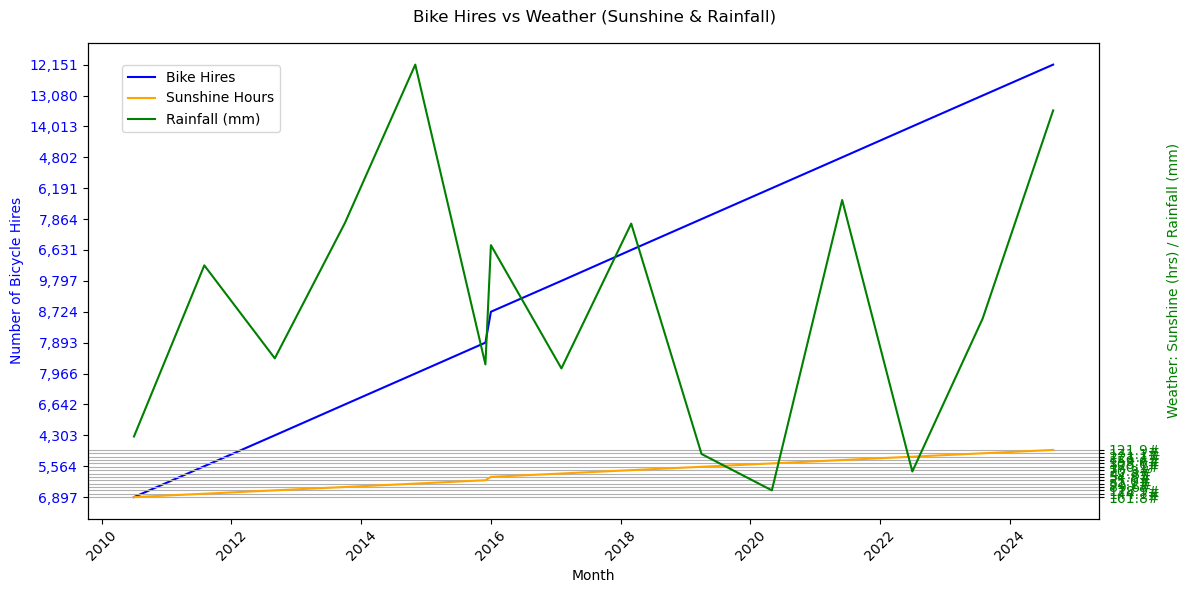

In [82]:
#plotting the data
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 1: Bike hires on primary y-axis
ax1.plot(merged["Month-Year"], merged["Number of Bicycle Hires"], color="blue", label="Bike Hires")
ax1.set_ylabel("Number of Bicycle Hires", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')

# Plot 2 & 3: Weather data on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(merged["Month-Year"], merged["sun hours"], color="orange", label="Sunshine Hours")
ax2.plot(merged["Month-Year"], merged["Rainfall"], color="green", label="Rainfall (mm)")
ax2.set_ylabel("Weather: Sunshine (hrs) / Rainfall (mm)", color="green")
ax2.tick_params(axis='y', labelcolor='green')

# X-axis and general formatting
ax1.set_xlabel("Month")
ax1.tick_params(axis='x', rotation=45)
fig.suptitle("Bike Hires vs Weather (Sunshine & Rainfall)")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()
